In [1]:
# importing packages
import numpy as np
import pandas as pd

In [2]:
# defining constants
PATH_STATION_HOUR = "station_hour.csv"
PATH_STATION_DAY = "station_day.csv"
PATH_STATION = "station.csv"
PATH_CITY_DAY = "city_day.csv"
PATH_CITY_HOUR = "city_hour.csv"
STATION = ["KL007","KL008"]

In [3]:
# importing data and subsetting the station
df = pd.read_csv(PATH_STATION_HOUR, parse_dates = ["Datetime"])
stations = pd.read_csv(PATH_STATION)

df = df.merge(stations, on = "StationId")
df = df[df.StationId.isin(STATION)]
df.sort_values(['StationId', 'Datetime'], inplace = True)
df['Date'] = df.Datetime.dt.date.astype(str)
df.Datetime = df.Datetime.astype(str)

C:\Users\Ayush(VIT)\AppData\Local\Temp\ipykernel_13316\1404225929.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH_STATION_HOUR, parse_dates = ["Datetime"])


In [4]:
df["PM10_24hr_avg"] = df.groupby("StationId")["PM10"].rolling(window = 24, min_periods = 16).mean().values
df["PM2.5_24hr_avg"] = df.groupby("StationId")["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
df["SO2_24hr_avg"] = df.groupby("StationId")["SO2"].rolling(window = 24, min_periods = 16).mean().values
df["NOx_24hr_avg"] = df.groupby("StationId")["NOx"].rolling(window = 24, min_periods = 16).mean().values
df["NH3_24hr_avg"] = df.groupby("StationId")["NH3"].rolling(window = 24, min_periods = 16).mean().values
df["CO_8hr_max"] = df.groupby("StationId")["CO"].rolling(window = 8, min_periods = 1).max().values
df["O3_8hr_max"] = df.groupby("StationId")["O3"].rolling(window = 8, min_periods = 1).max().values

In [5]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

In [6]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

In [7]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

In [8]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

In [9]:
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))

In [10]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

In [11]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

In [12]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                (df["PM10_SubIndex"] > 0).astype(int) + \
                (df["SO2_SubIndex"] > 0).astype(int) + \
                (df["NOx_SubIndex"] > 0).astype(int) + \
                (df["NH3_SubIndex"] > 0).astype(int) + \
                (df["CO_SubIndex"] > 0).astype(int) + \
                (df["O3_SubIndex"] > 0).astype(int)

df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df[~df.AQI_calculated.isna()].head(13)

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
1667827,KL007,2020-02-14 08:00:00,35.81,51.71,22.90,27.43,52.33,22.90,0.71,1.14,...,66.084375,0.000000,2.350000,43.417187,2.071094,35.5,31.950000,6,66.0,Satisfactory
1667828,KL007,2020-02-14 09:00:00,38.47,58.54,48.09,51.82,101.90,48.09,1.46,1.65,...,65.968627,60.143125,2.333088,48.355882,2.656471,73.0,31.950000,7,73.0,Satisfactory
1667829,KL007,2020-02-14 10:00:00,47.94,76.12,12.11,34.90,49.01,12.11,0.81,1.77,...,66.742593,61.082941,2.326389,49.072917,2.677083,73.0,55.360000,7,73.0,Satisfactory
1667830,KL007,2020-02-14 11:00:00,53.81,79.47,5.82,27.12,34.94,5.82,0.48,1.97,...,67.950000,62.104444,2.333553,48.788816,2.612763,73.0,81.290000,7,81.0,Satisfactory
1667831,KL007,2020-02-14 12:00:00,46.91,61.87,5.85,30.14,38.00,5.85,0.42,2.11,...,68.461667,62.092105,2.348750,48.724375,2.555250,73.0,87.830000,7,88.0,Satisfactory
1667832,KL007,2020-02-14 13:00:00,45.43,72.93,4.13,18.97,25.11,4.13,0.27,2.38,...,68.807143,62.634000,2.378571,47.898810,2.482738,73.0,100.485294,7,100.0,Satisfactory
1667833,KL007,2020-02-14 14:00:00,42.52,66.83,6.44,28.01,36.46,6.44,0.39,2.65,...,68.900758,62.833810,2.421023,47.793182,2.443068,73.0,100.485294,7,100.0,Satisfactory
1667834,KL007,2020-02-14 15:00:00,38.99,66.50,5.58,25.85,33.42,5.58,0.33,2.48,...,68.730435,63.000455,2.450543,47.531522,2.397500,73.0,104.882353,7,105.0,Moderate
1667835,KL007,2020-02-14 16:00:00,35.14,85.24,5.76,28.52,36.28,5.76,0.32,2.48,...,68.306944,63.967391,2.477604,47.440625,2.357604,73.0,104.882353,7,105.0,Moderate
1667836,KL007,2020-02-14 17:00:00,43.85,74.63,4.31,19.27,25.59,4.31,0.19,2.79,...,68.786806,64.411667,2.490104,47.408333,2.356979,40.5,104.882353,7,105.0,Moderate


In [31]:
stat = df[~df.AQI_calculated.isna()].AQI_bucket_calculated.value_counts()
stat

AQI_bucket_calculated
Satisfactory    17568
Good             5089
Moderate         4487
Poor              121
Name: count, dtype: int64

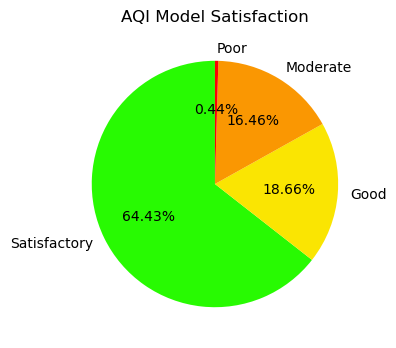

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
stat.plot(kind='pie', autopct='%1.2f%%', startangle=90, colors=['#28fa02', '#fae502', '#fa9702', '#fa0202'])
plt.title('AQI Model Satisfaction')
plt.ylabel('')
plt.show()

# Day Level

In [40]:
df_station_hour = df
df_station_day = pd.read_csv(PATH_STATION_DAY)

df_station_day = df_station_day.merge(df.groupby(["StationId", "Date"])["AQI_calculated"].mean().reset_index(), on = ["StationId", "Date"])
df_station_day.AQI_calculated = round(df_station_day.AQI_calculated)
df_station_day[['Date', 'AQI_Bucket', 'AQI_calculated']]

,Date,AQI_Bucket,AQI_calculated
0,2020-02-13,NaN,NaN
1,2020-02-14,Satisfactory,95.0
2,2020-02-15,Satisfactory,87.0
3,2020-02-16,Satisfactory,87.0
4,2020-02-17,Moderate,116.0
...,...,...,...
1247,2020-06-27,Good,42.0
1248,2020-06-28,Good,43.0
1249,2020-06-29,Good,49.0
1250,2020-06-30,Good,40.0


# City Level

In [16]:
df_city_hour = pd.read_csv(PATH_CITY_HOUR)
df_city_day = pd.read_csv(PATH_CITY_DAY)

df_city_hour["Date"] = pd.to_datetime(df_city_hour.Datetime).dt.date.astype(str)

df_city_hour = df_city_hour.merge(df.groupby(["City", "Datetime"])["AQI_calculated"].mean().reset_index(), on = ["City", "Datetime"])
df_city_hour.AQI_calculated = round(df_city_hour.AQI_calculated)

df_city_day = df_city_day.merge(df_city_hour.groupby(["City", "Date"])["AQI_calculated"].mean().reset_index(), on = ["City", "Date"])
df_city_day.AQI_calculated = round(df_city_day.AQI_calculated)

# Verification

In [17]:
df_check_station_hour = df_station_hour[["AQI", "AQI_calculated"]].dropna()
df_check_station_day = df_station_day[["AQI", "AQI_calculated"]].dropna()
df_check_city_hour = df_city_hour[["AQI", "AQI_calculated"]].dropna()
df_check_city_day = df_city_day[["AQI", "AQI_calculated"]].dropna()

print("Station + Hour")
print("Rows: ", df_check_station_hour.shape[0])
print("Matched AQI: ", (df_check_station_hour.AQI == df_check_station_hour.AQI_calculated).sum())
print("% Match: ", (df_check_station_hour.AQI == df_check_station_hour.AQI_calculated).sum() * 100 / df_check_station_hour.shape[0])
print("\n")
print("Station + Day")
print("Rows: ", df_check_station_day.shape[0])
print("Matched AQI: ", (df_check_station_day.AQI == df_check_station_day.AQI_calculated).sum())
print("% Match: ", (df_check_station_day.AQI == df_check_station_day.AQI_calculated).sum() * 100 / df_check_station_day.shape[0])
print("\n")
print("City + Hour")
print("Rows: ", df_check_city_hour.shape[0])
print("Matched AQI: ", (df_check_city_hour.AQI == df_check_city_hour.AQI_calculated).sum())
print("% Match: ", (df_check_city_hour.AQI == df_check_city_hour.AQI_calculated).sum() * 100 / df_check_city_hour.shape[0])
print("\n")
print("City + Day")
print("Rows: ", df_check_city_day.shape[0])
print("Matched AQI: ", (df_check_city_day.AQI == df_check_city_day.AQI_calculated).sum())
print("% Match: ", (df_check_city_day.AQI == df_check_city_day.AQI_calculated).sum() * 100 / df_check_city_day.shape[0])

Station + Hour
Rows:  27265
Matched AQI:  27265
% Match:  100.0


Station + Day
Rows:  1170
Matched AQI:  1170
% Match:  100.0


City + Hour
Rows:  24734
Matched AQI:  24734
% Match:  100.0


City + Day
Rows:  1052
Matched AQI:  1052
% Match:  100.0
